In [2]:
library(ggplot2)
library(gridExtra)
library(xlsx)
library(dplyr)
library(scales)
library(ggplotify)
library(survival)
library(survminer)

In [3]:
basePath = "/data/bcu_projects/MelBrainSys_PostdocProject_Gruetzmann/publications/2022-my-MelBrainSys-paper/scripts-etc-for-publication/"
setwd(basePath)

In [4]:
outDirectory = paste0(basePath,"FiguresTables/")

In [5]:
# for each samples -> which subgroup it belongs to 
subgroupPerSample = c(P04_Br = 'SG1', P04_Sk_GA = 'SG1', P08_Br = 'SG1 | SG2 | SG3', P08_St_BA = 'SG1', P16_Br = 'SG1', P16_Lu='SG1', 
  P42_Br_GA = 'SG1 | SG3', P42_Ly_GA = 'SG1', P08_St_GA = 'SG2', P18_Br = 'SG2 | SG3',
  P18_Lu_YA = 'SG2', P39_Br = 'SG2', P39_Lu = 'SG2', P03_Br = 'SG3', P03_Lu = 'SG3', 
  P08_St_YA = 'SG3', P18_Lu_GA = 'SG3', P42_Ly_YA ='SG3')
subgroupPerSample
subgroupPerSampleNA = c(P04_Br = 'SG1', P04_Sk_GA = 'SG1', P08_Br = "NA", P08_St_BA = 'SG1', P16_Br = 'SG1', P16_Lu='SG1', 
  P42_Br_GA = "NA", P42_Ly_GA = 'SG1', P08_St_GA = 'SG2', P18_Br = "NA",
  P18_Lu_YA = 'SG2', P39_Br = 'SG2', P39_Lu = 'SG2', P03_Br = 'SG3', P03_Lu = 'SG3', 
  P08_St_YA = 'SG3', P18_Lu_GA = 'SG3', P42_Ly_YA ='SG3')
subgroupPerSampleNA
melBrainSysSamples = names(subgroupPerSample)
melBrainSysSamples

P04_Br         P04_Sk_GA            P08_Br         P08_St_BA 
            "SG1"             "SG1" "SG1 | SG2 | SG3"             "SG1" 
           P16_Br            P16_Lu         P42_Br_GA         P42_Ly_GA 
            "SG1"             "SG1"       "SG1 | SG3"             "SG1" 
        P08_St_GA            P18_Br         P18_Lu_YA            P39_Br 
            "SG2"       "SG2 | SG3"             "SG2"             "SG2" 
           P39_Lu            P03_Br            P03_Lu         P08_St_YA 
            "SG2"             "SG3"             "SG3"             "SG3" 
        P18_Lu_GA         P42_Ly_YA 
            "SG3"             "SG3"

P04_Br P04_Sk_GA    P08_Br P08_St_BA    P16_Br    P16_Lu P42_Br_GA P42_Ly_GA 
    "SG1"     "SG1"      "NA"     "SG1"     "SG1"     "SG1"      "NA"     "SG1" 
P08_St_GA    P18_Br P18_Lu_YA    P39_Br    P39_Lu    P03_Br    P03_Lu P08_St_YA 
    "SG2"      "NA"     "SG2"     "SG2"     "SG2"     "SG3"     "SG3"     "SG3" 
P18_Lu_GA P42_Ly_YA 
    "SG3"     "SG3"

[1] "P04_Br"    "P04_Sk_GA" "P08_Br"    "P08_St_BA" "P16_Br"    "P16_Lu"   
 [7] "P42_Br_GA" "P42_Ly_GA" "P08_St_GA" "P18_Br"    "P18_Lu_YA" "P39_Br"   
[13] "P39_Lu"    "P03_Br"    "P03_Lu"    "P08_St_YA" "P18_Lu_GA" "P42_Ly_YA"

### TCGA clinical info

In [6]:
TCGAinfo = read.xlsx(file = "annotation/NIHMS698912-supplement-3.xlsx", 
                     sheetName = "Supplemental Table S1D" , startRow = 2, as.data.frame = T, stringsAsFactors=F)
head(TCGAinfo,3)

,Name,ALL_SAMPLES,MUTATIONSUBTYPES,ALL_PRIMARY_VS_METASTATIC,REGIONAL_VS_PRIMARY,UV.signature,RNASEQ.CLUSTER_CONSENHIER,MethTypes.201408,MIRCluster,ProteinCluster,⋯,CURATED_DISTANT_ANATOMIC_SITE,CURATED_VITAL_STATUS,CURATED_DAYS_TO_DEATH_OR_LAST_FU,CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU,CURATED_MELANOMA_SPECIFIC_VITAL_STATUS..0....ALIVE.OR.CENSORED...1....DEAD.OF.MELANOMA..,CURATED_TCGA_SPECIMEN_Distant,CC.TT.nTotal.Mut,DIPYRIM.C.T.nTotal.Mut,DIPYRIM.C.T.n.C.T..mut,SHATTERSEEK_Chromothripsis_calls
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCGA-ER-A194-01,Yes,RAS_Hotspot_Mutants,All_Primaries,Primary_Disease,UV signature,immune,hyper-methylated,MIR.type.2,PROT.type.3,⋯,[Not Available],Dead,1354,1276,1,Primary Tumor,0.047344111,0.846420323,0.98787062,negative
2,TCGA-EE-A2MR-06,Yes,Triple_WT,All_Metastases,Regional_Lymph_Node,UV signature,immune,normal-like,MIR.type.2,PROT.type.3,⋯,[Not Available],Alive,3150,885,0,Regional Lymph Node,0.032851115,0.891500904,0.998986829,n/a
3,TCGA-ER-A19N-06,Yes,RAS_Hotspot_Mutants,All_Metastases,Regional_Lymph_Node,UV signature,immune,normal-like,MIR.type.3,PROT.type.3,⋯,[Not Available],Alive,1340,1303,0,Regional Lymph Node,0.067741935,0.783870968,0.983805668,negative


### MelBrainSys + TCGA sample expression

In [7]:
melBrainSysExpr = read.csv(file = "data/MelBrainSys-expression.csv", header = T,sep = "\t", stringsAsFactors = F)
head(melBrainSysExpr,3)
melBrainSysExpr = melBrainSysExpr[ ,melBrainSysSamples ]
head(melBrainSysExpr,3)
nrow(melBrainSysExpr)

,geneSymbol,chr,pos,P16_Br,P16_Lu,P17_Ly_YA,P17_Ly_GA,P18_Br,P18_Lu_YA,P18_Lu_GA,⋯,P06_Br_YA,P06_Br_GA,P06_Ly,P64_Lu,P67_Br_BA,P67_Br_GA,P08_Br,P08_St_GA,P08_St_BA,P08_St_YA
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NOC2L,chr1,887127,5.8322955,6.037453,6.303197,6.7279647,6.335936,6.7659108,6.865148,⋯,6.923254,6.642663,6.6936242,6.2764296,6.729276,6.579624,7.265025,7.3369872,7.2165933,7.135830
2,KLHL17,chr1,898531,-0.5621772,1.468977,1.713494,2.3754134,1.321752,3.1430347,2.167239,⋯,2.422577,2.254659,2.6668530,1.0399100,2.383997,3.006990,2.923033,3.5478819,2.7090631,2.852682
3,HES4,chr1,934947,-0.6395067,-4.283633,-1.501055,0.9912391,1.398305,0.1379307,1.940562,⋯,-1.113011,-1.175142,0.0334023,-0.9092056,-2.308214,2.237329,2.026139,0.5083688,-0.6707293,1.881657


,P04_Br,P04_Sk_GA,P08_Br,P08_St_BA,P16_Br,P16_Lu,P42_Br_GA,P42_Ly_GA,P08_St_GA,P18_Br,P18_Lu_YA,P39_Br,P39_Lu,P03_Br,P03_Lu,P08_St_YA,P18_Lu_GA,P42_Ly_YA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.2305103,7.38327304,7.265025,7.2165933,5.8322955,6.037453,6.8176631,6.6803685,7.3369872,6.335936,6.7659108,7.0824940,7.0615024,6.270591,6.422676,7.135830,6.865148,6.060505
2,2.6105013,3.05571510,2.923033,2.7090631,-0.5621772,1.468977,2.9757518,3.6794055,3.5478819,1.321752,3.1430347,1.2910222,1.8072757,2.014892,2.478935,2.852682,2.167239,2.354218
3,-0.2636839,0.01585192,2.026139,-0.6707293,-0.6395067,-4.283633,0.7942271,-0.2713107,0.5083688,1.398305,0.1379307,-0.3141385,0.7767652,-1.604842,-2.830589,1.881657,1.940562,2.432413


[1] 8251

In [8]:
tcgaExpr = read.csv(file = "data/TCGA-expression.csv", header = T,sep = "\t", stringsAsFactors = F)
head(tcgaExpr,3)
colnames(tcgaExpr) = gsub("\\.","\\-",colnames(tcgaExpr))

,geneSymbol,chr,pos,TCGA.BF.A1PU.01,TCGA.BF.A1PV.01,TCGA.BF.A1PX.01,TCGA.BF.A1PZ.01,TCGA.BF.A3DJ.01,TCGA.BF.A3DM.01,TCGA.BF.A3DN.01,⋯,TCGA.GF.A2C7.01,TCGA.GF.A3OT.06,TCGA.GN.A262.06,TCGA.GN.A263.01,TCGA.GN.A265.06,TCGA.GN.A267.06,TCGA.GN.A268.06,TCGA.GN.A26A.06,TCGA.GN.A26D.06,TCGA.HR.A5NC.01
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NOC2L,chr1,887127,6.702927,7.506216,7.3536418,7.5527593,6.7940935,7.8001608,6.438719,⋯,6.320593,7.774894,7.869414,5.85987063,8.0767768,7.698355,7.609606,8.2928188,6.689367,6.129037
2,KLHL17,chr1,898531,2.524458,3.581854,1.8863971,3.3867555,2.5493458,2.4142473,1.246689,⋯,2.304777,4.523496,3.997421,0.04818819,3.2792568,3.688836,4.444516,3.1149303,1.624958,2.909801
3,HES4,chr1,934947,1.030696,3.166422,0.3773996,0.9425393,-0.9829983,0.9366146,-2.111562,⋯,-1.218591,2.376759,1.699015,-0.06880224,0.1592957,2.768496,1.789248,-0.4265386,-1.908413,-2.078192


### assignment of MelBrainSys and TCGA samples by expression

In [9]:
sampleCor = matrix(data=NA, nrow=ncol(tcgaExpr)-3, ncol=length(melBrainSysSamples), 
                   dimnames = c(list(colnames(tcgaExpr)[-c(1:3)]), list(melBrainSysSamples)))
sampleCorPval = matrix(data=NA, nrow=ncol(tcgaExpr)-3, ncol=length(melBrainSysSamples), 
                   dimnames = c(list(colnames(tcgaExpr)[-c(1:3)]), list(melBrainSysSamples)))
head(sampleCor,2)

,P04_Br,P04_Sk_GA,P08_Br,P08_St_BA,P16_Br,P16_Lu,P42_Br_GA,P42_Ly_GA,P08_St_GA,P18_Br,P18_Lu_YA,P39_Br,P39_Lu,P03_Br,P03_Lu,P08_St_YA,P18_Lu_GA,P42_Ly_YA
TCGA-BF-A1PU-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-BF-A1PV-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [10]:
for(s1 in rownames(sampleCor)) {
    for(s2 in melBrainSysSamples) {
        sampleCor[ s1, s2] = cor(x = tcgaExpr[,s1], y = melBrainSysExpr[,s2] )
        sampleCorPval[ s1, s2] = cor.test(x = tcgaExpr[,s1], y = melBrainSysExpr[,s2] )$p.value
    }
}

In [11]:
quantile(sampleCorPval, probs = c(0,50,97,98,99,100)/100) # all cor. are highly signif
head(sampleCor,2)
quantile(sampleCor) # 0.21 .. 0.74, median 0.63

0%           50%           97%           98%           99% 
 0.000000e+00  0.000000e+00  0.000000e+00 2.053840e-282 5.535522e-233 
         100% 
 4.220941e-83

,P04_Br,P04_Sk_GA,P08_Br,P08_St_BA,P16_Br,P16_Lu,P42_Br_GA,P42_Ly_GA,P08_St_GA,P18_Br,P18_Lu_YA,P39_Br,P39_Lu,P03_Br,P03_Lu,P08_St_YA,P18_Lu_GA,P42_Ly_YA
TCGA-BF-A1PU-01,0.5595378,0.5339674,0.6018146,0.5681202,0.4972946,0.5297915,0.5182335,0.5210563,0.5644523,0.5554960,0.5723036,0.5947895,0.5441170,0.5143048,0.5596739,0.5537790,0.5361107,0.4613617
TCGA-BF-A1PV-01,0.6395730,0.6341119,0.6882146,0.6657361,0.6113490,0.6370941,0.6071157,0.6561371,0.6633554,0.6518355,0.6655169,0.6657637,0.6149521,0.6045844,0.6248896,0.6424141,0.6457306,0.6024716


0%       25%       50%       75%      100% 
0.2102611 0.5837705 0.6272310 0.6581585 0.7422669

In [12]:
sampleCor[1:2,1:3]
sampleCorWhMax = apply(sampleCor,1,which.max)
table(sapply(1:length(sampleCorWhMax), function(i) length(which(sampleCor[i,] == sampleCor[i,sampleCorWhMax[i]]))))
# for each TCGA sample, there is exactly 1 MelBrainSys sample with max correl., not ambiguous
#  cbind(sampleCorWhMax,sampleCor)  
table(sampleCorWhMax); # 18 MelBrainSys samples, TCGA samples are assigned to 9 of them

,P04_Br,P04_Sk_GA,P08_Br
TCGA-BF-A1PU-01,0.5595378,0.5339674,0.6018146
TCGA-BF-A1PV-01,0.6395730,0.6341119,0.6882146



  1 
270 

sampleCorWhMax
 1  3  4  6 11 12 13 15 17 
 3 80 16 25 55 38 22 30  1 

In [13]:
TCGAassignSubgroups = unname(subgroupPerSample[melBrainSysSamples[sampleCorWhMax]])
table(TCGAassignSubgroups) 
TCGAassignSubgroups = unname(subgroupPerSampleNA[melBrainSysSamples[sampleCorWhMax]])
table(TCGAassignSubgroups) # 80 of 270 cannot be assigned unambiguously
# -> omit these TCGE samples

names(TCGAassignSubgroups) = rownames(sampleCor)
TCGAassignSubgroups = TCGAassignSubgroups[ which(!TCGAassignSubgroups=="NA")]
head(TCGAassignSubgroups)
table(TCGAassignSubgroups) # each subgroup is present, none marginally frequent

TCGAassignSubgroups
            SG1 SG1 | SG2 | SG3             SG2             SG3 
             44              80             115              31 

TCGAassignSubgroups
 NA SG1 SG2 SG3 
 80  44 115  31 

TCGA-BF-A1PX-01 TCGA-BF-A3DJ-01 TCGA-BF-A3DM-01 TCGA-BF-A3DN-01 TCGA-BF-A5ES-01 
          "SG2"           "SG3"           "SG2"           "SG2"           "SG2" 
TCGA-D3-A1Q4-06 
          "SG2"

TCGAassignSubgroups
SG1 SG2 SG3 
 44 115  31 

In [14]:
length(intersect(TCGAinfo$Name, names(TCGAassignSubgroups))) # 190 of 270 patients have subgroup
TCGAinfo$Subgroup = paste0("TCGA: ",TCGAassignSubgroups[TCGAinfo$Name]) 
table(TCGAinfo$Subgroup)
TCGAinfoClean = TCGAinfo[ !(TCGAinfo$Subgroup=="TCGA: NA"),]
table(TCGAinfoClean$Subgroup)

[1] 190


 TCGA: NA TCGA: SG1 TCGA: SG2 TCGA: SG3 
      143        44       115        31 


TCGA: SG1 TCGA: SG2 TCGA: SG3 
       44       115        31 

### test and plot associations

#### T stage

In [15]:
head(TCGAinfoClean$CURATED_T_STAGE_AT_DIAGNOSIS_SIMPLE)
TCGAinfoClean$T_STAGE = as.character(TCGAinfoClean$CURATED_T_STAGE_AT_DIAGNOSIS_SIMPLE)
TCGAinfoClean$T_STAGE[ grep("A", TCGAinfoClean$T_STAGE)] = NA
TCGAinfoClean$T_STAGE[ grep("\\-", TCGAinfoClean$T_STAGE)] = NA
table(TCGAinfoClean$T_STAGE)
TCGAinfoClean$T_STAGE_ord = factor(TCGAinfoClean$T_STAGE, ordered = T, 
                                       levels=c("T0", "T1", "T2", "T3", "T4" ))

[1] "-"  "-"  "-"  "T2" "T0" "T4"


[ERROR]      T0      T1      T2      T3      T4 
      2      22      26      31      26      39 

In [16]:
tStageDistrib = TCGAinfoClean %>% group_by(Subgroup) %>% 
    summarise(T_stage_T0 = length(which(T_STAGE == "T0")),
              T_stage_T1 = length(which(T_STAGE == "T1")),
              T_stage_T2 = length(which(T_STAGE == "T2")),
              T_stage_T3 = length(which(T_STAGE == "T3")),
              T_stage_T4 = length(which(T_STAGE == "T4")))
tStageDistrib

Subgroup,T_stage_T0,T_stage_T1,T_stage_T2,T_stage_T3,T_stage_T4
<chr>,<int>,<int>,<int>,<int>,<int>
TCGA: SG1,5,9,9,4,4
TCGA: SG2,9,16,17,16,29
TCGA: SG3,8,1,5,6,6


In [17]:
# Kruskal Wallis test:
kruskal.test(T_STAGE_ord ~ Subgroup, data=TCGAinfoClean ) # 0.0465
kruskal.test(T_STAGE_ord ~ Subgroup, 
                 data=TCGAinfoClean[ TCGAinfoClean$Subgroup %in% c("TCGA: SG1","TCGA: SG2"),] ) # 0.01678
kruskal.test(T_STAGE_ord ~ Subgroup, 
                 data=TCGAinfoClean[ TCGAinfoClean$Subgroup %in% c("TCGA: SG1","TCGA: SG3"),] ) # 0.48
kruskal.test(T_STAGE_ord ~ Subgroup, 
                 data=TCGAinfoClean[ TCGAinfoClean$Subgroup %in% c("TCGA: SG2","TCGA: SG3"),] ) # 0.22


	Kruskal-Wallis rank sum test

data:  T_STAGE_ord by Subgroup
Kruskal-Wallis chi-squared = 6.0514, df = 2, p-value = 0.04852



	Kruskal-Wallis rank sum test

data:  T_STAGE_ord by Subgroup
Kruskal-Wallis chi-squared = 5.7195, df = 1, p-value = 0.01678



	Kruskal-Wallis rank sum test

data:  T_STAGE_ord by Subgroup
Kruskal-Wallis chi-squared = 0.49574, df = 1, p-value = 0.4814



	Kruskal-Wallis rank sum test

data:  T_STAGE_ord by Subgroup
Kruskal-Wallis chi-squared = 1.5107, df = 1, p-value = 0.219


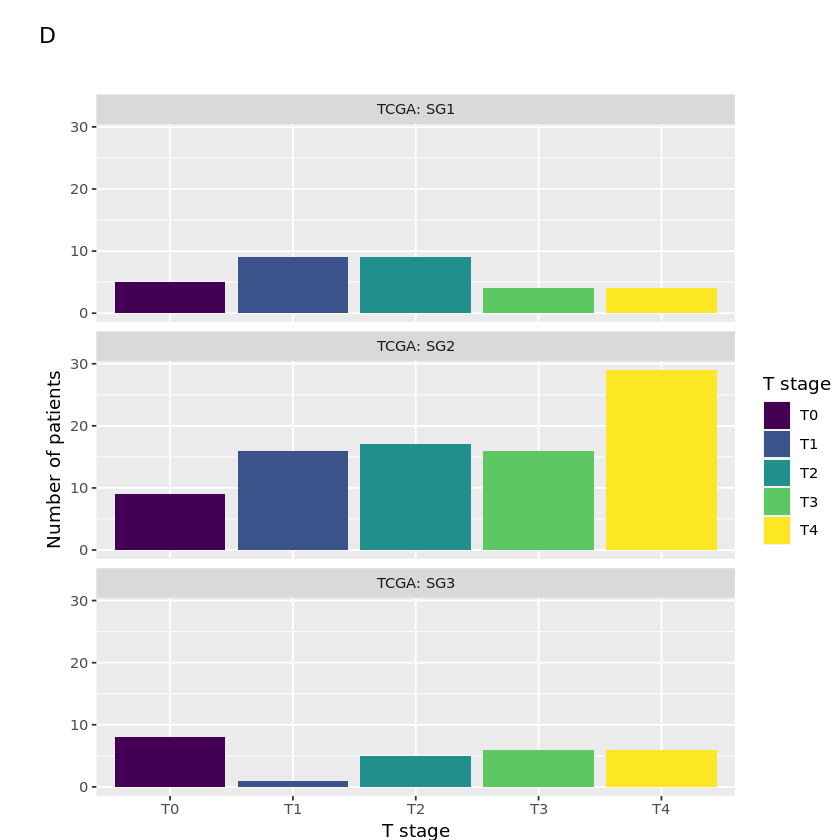

In [18]:
plotTstage = ggplot(TCGAinfoClean[ !is.na(TCGAinfoClean$T_STAGE_ord),], aes(x=T_STAGE_ord, fill=T_STAGE_ord)) + 
    geom_bar() + facet_wrap(~Subgroup, ncol = 1) + xlab("T stage") + ylab("Number of patients") + 
    theme(plot.margin = margin(2,0,0,1, "cm"))
    #+ theme(plot.background = element_rect(colour = "grey", fill=NA, size=5))
plotTstage  = plotTstage + guides(fill=guide_legend(title="T stage"))
plotTstage = plotTstage + labs(tag = "D") + theme(plot.tag.position = c(0.0, 1.08))
plotTstage
#png(filename = paste0(outDirectory,"Figure-tumor-stage-vs-subgroup.png"), width = 600,height = 400)
#plotTstage + guides(fill=guide_legend(title="T stage"))
#dev.off()

### mutation subtypes 

In [19]:
table(TCGAinfoClean$MUTATIONSUBTYPES)
TCGAinfoClean$MUTATIONSUBTYPES[ which(TCGAinfoClean$MUTATIONSUBTYPES=="-")] = NA


                   - BRAF_Hotspot_Mutants      NF1_Any_Mutants 
                   7                   95                   11 
 RAS_Hotspot_Mutants            Triple_WT 
                  52                   25 

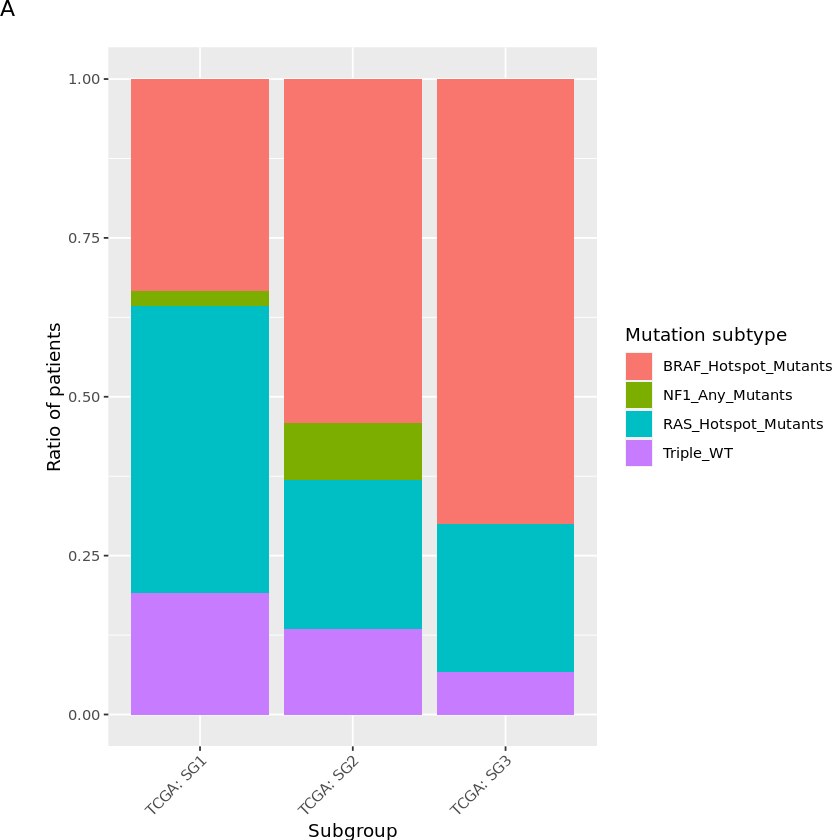

In [20]:
plotMutSubtype = ggplot(TCGAinfoClean[ !is.na(TCGAinfoClean$MUTATIONSUBTYPES),], aes(x=Subgroup,fill=MUTATIONSUBTYPES)) + 
    geom_bar(position = "fill") + ylab("Ratio of patients") + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), 
         plot.margin = margin(1,0,0,1, "cm"))
#, 
         #plot.background = element_rect(colour = "grey", fill=NA, size=5))
plotMutSubtype = plotMutSubtype + guides(fill=guide_legend(title="Mutation subtype"))
plotMutSubtype = plotMutSubtype + labs(tag = "A") + theme(plot.tag.position = c(-0.05, 1.05))
plotMutSubtype
#grid.arrange(p1, p2, widths=c(1,1.5), ncol=2)
#png(filename = paste0(outDirectory,"mutationsubtypes-vs-subgroup.png"), width=700)
#grid.arrange(p1, p2, widths=c(1,1.55), ncol=2)
#dev.off()

In [21]:
m = table(TCGAinfoClean$MUTATIONSUBTYPES, TCGAinfoClean$Subgroup)
m
chisq.test(m) # p-value = 0.01103

                      
                       TCGA: SG1 TCGA: SG2 TCGA: SG3
  BRAF_Hotspot_Mutants        14        60        21
  NF1_Any_Mutants              1        10         0
  RAS_Hotspot_Mutants         19        26         7
  Triple_WT                    8        15         2

Warning message in chisq.test(m):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  m
X-squared = 16.563, df = 6, p-value = 0.01103


### methylation subtypes

In [22]:
table(TCGAinfoClean$MethTypes.201408)


CpG island-methylated      hyper-methylated       hypo-methylated 
                   32                    61                    55 
          normal-like 
                   42 

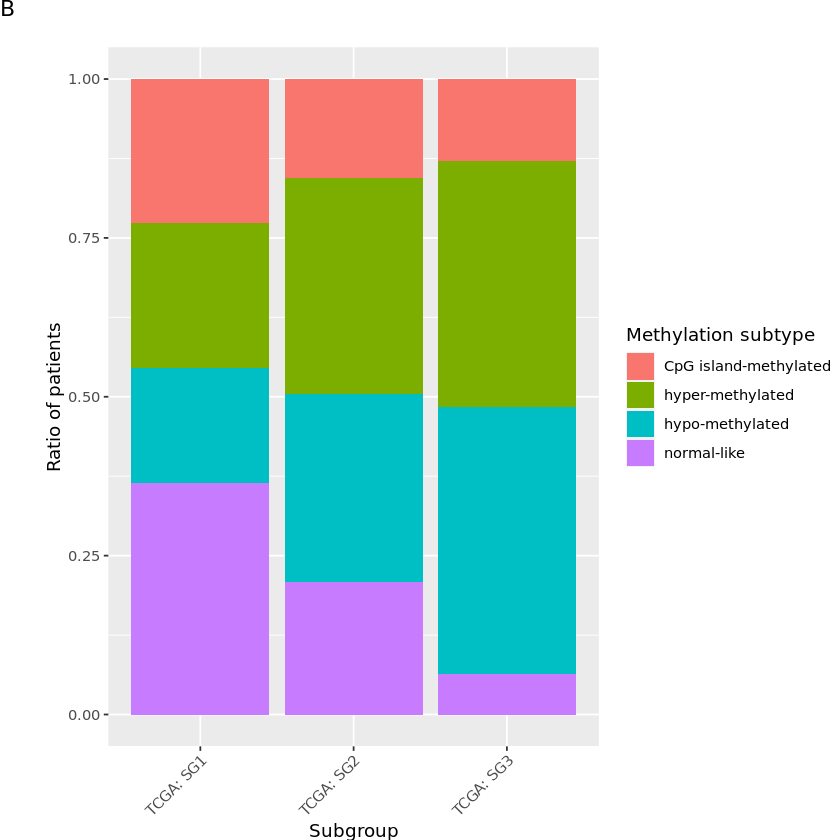

In [23]:
plotMethSubtype = ggplot(TCGAinfoClean[ !is.na(TCGAinfoClean$MethTypes.201408),], aes(x=Subgroup,fill=MethTypes.201408)) + 
    geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), 
         plot.margin = margin(1,0,0,1, "cm")) + 
    ylab("Ratio of patients") #, 
         #plot.background = element_rect(colour = "grey", fill=NA, size=5))
plotMethSubtype = plotMethSubtype + guides(fill=guide_legend(title="Methylation subtype"))
plotMethSubtype = plotMethSubtype + labs(tag = "B") + theme(plot.tag.position = c(-0.05, 1.05))
plotMethSubtype
#grid.arrange(p1, p2, widths=c(1,1.5), ncol=2)
#png(filename = paste0(outDirectory,"meth-types-vs-subgroup-barplot.png"), width=700)
#grid.arrange(p1, p2, widths=c(1,1.55), ncol=2)
#dev.off()

In [24]:
m = table(TCGAinfoClean$MethTypes.201408, TCGAinfoClean$Subgroup)
m
chisq.test(m) # p-value =  0.02773

                       
                        TCGA: SG1 TCGA: SG2 TCGA: SG3
  CpG island-methylated        10        18         4
  hyper-methylated             10        39        12
  hypo-methylated               8        34        13
  normal-like                  16        24         2


	Pearson's Chi-squared test

data:  m
X-squared = 14.176, df = 6, p-value = 0.02773


### total mutations

In [25]:
TCGAinfoClean$TOTAL.MUTATIONS = as.numeric(TCGAinfoClean$TOTAL.MUTATIONS)
quantile(TCGAinfoClean$TOTAL.MUTATIONS,na.rm = T)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


0%  25%  50%  75% 100% 
  24  198  396  687 4728

Warning message:
“Removed 5 rows containing non-finite values (`stat_ydensity()`).”


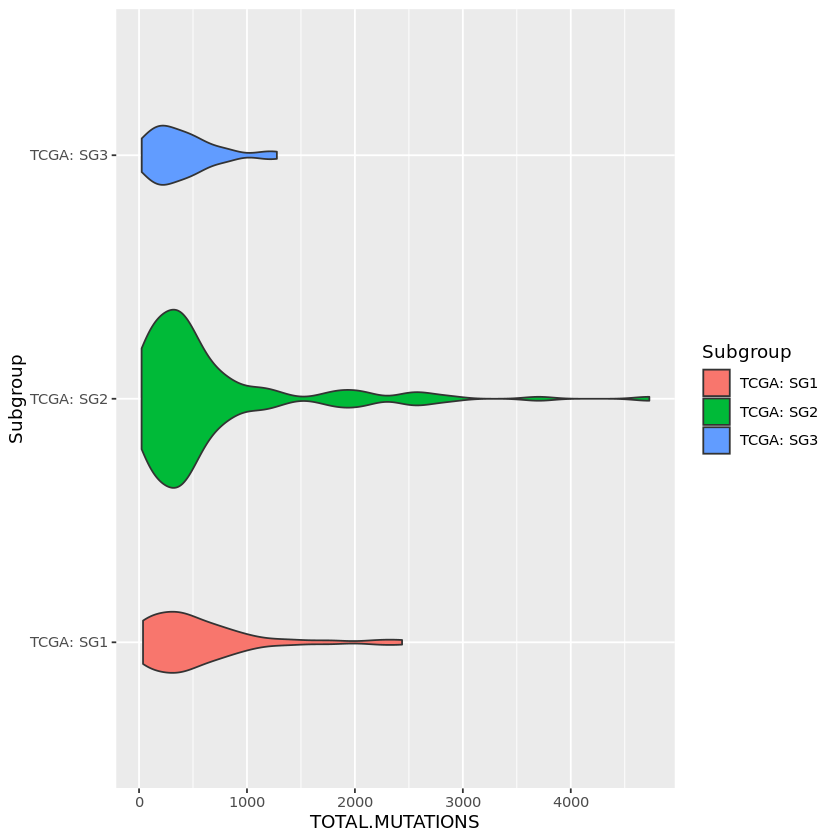

In [26]:
p = ggplot(TCGAinfoClean, aes(x=TOTAL.MUTATIONS, y=Subgroup, fill=Subgroup)) + geom_violin(scale = "count")
p 

In [27]:
kruskal.test(TOTAL.MUTATIONS ~ Subgroup, data=TCGAinfoClean ) # 0.4392


	Kruskal-Wallis rank sum test

data:  TOTAL.MUTATIONS by Subgroup
Kruskal-Wallis chi-squared = 1.6454, df = 2, p-value = 0.4392


### RNA seq consensus hierarch clusters

In [28]:
TCGAinfoClean$RNASEQ.CLUSTER_CONSENHIER[ which(TCGAinfoClean$RNASEQ.CLUSTER_CONSENHIER=="-")] = NA
table(TCGAinfoClean$RNASEQ.CLUSTER_CONSENHIER)


  immune  keratin MITF-low 
     110       41       37 

          
           TCGA: SG1 TCGA: SG2 TCGA: SG3
  immune          32        64        14
  keratin          7        28         6
  MITF-low         3        23        11


	Pearson's Chi-squared test

data:  m
X-squared = 11.578, df = 4, p-value = 0.02078


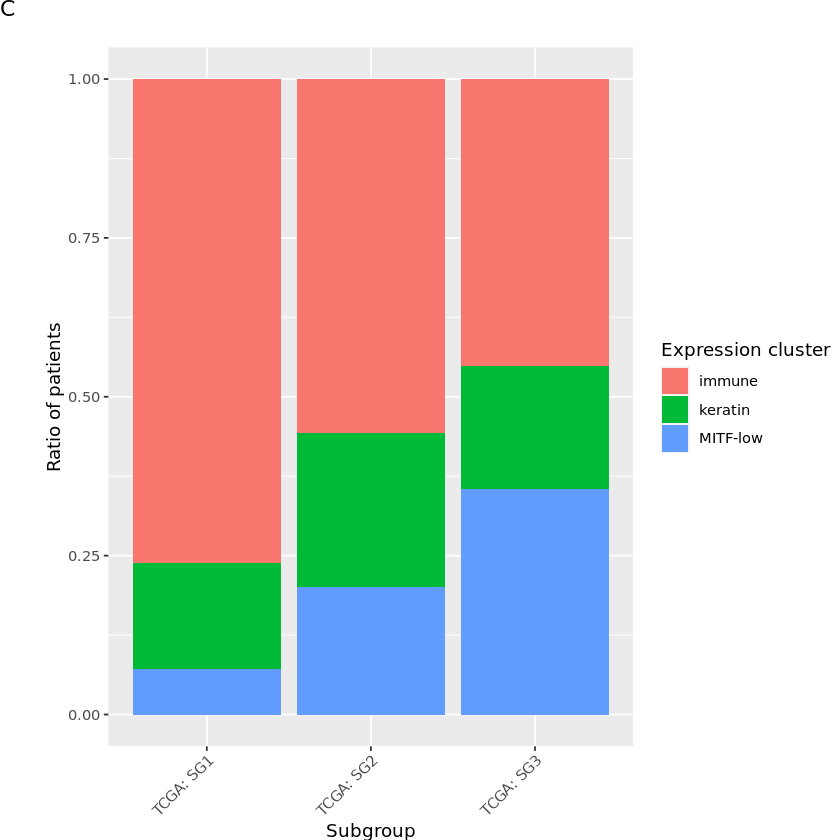

In [29]:
m = table(TCGAinfoClean$RNASEQ.CLUSTER_CONSENHIER, TCGAinfoClean$Subgroup)
m
chisq.test(m) # p-value = 0.02078

plotExprCluster = ggplot(TCGAinfoClean[ !is.na(TCGAinfoClean$RNASEQ.CLUSTER_CONSENHIER),], aes(x=Subgroup,fill=RNASEQ.CLUSTER_CONSENHIER)) + 
    geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), 
         plot.margin = margin(1,0,0,1, "cm")) + 
    ylab("Ratio of patients") #, 
         #plot.background = element_rect(colour = "grey", fill=NA, size=5))
plotExprCluster = plotExprCluster + guides(fill=guide_legend(title="Expression cluster"))
plotExprCluster = plotExprCluster + labs(tag = "C") + theme(plot.tag.position = c(-0.05, 1.05))
plotExprCluster
# grid.arrange(p1, p2, widths=c(1,1.5), ncol=2)
# png(filename = paste0(outDirectory,"RNAseq-clusters-vs-subgroup-barplot.png"), width=700)
# grid.arrange(p1, p2, widths=c(1,1.55), ncol=2)
# dev.off()

In [41]:
# main text figure A-D
png(paste0(outDirectory,"Figure-6-TCGA-associations.png"), width = 2400, height = 2400, res=210)
margin = theme(plot.margin = unit(c(1,1,1,1), "cm"))
pl = list(plotMutSubtype,plotMethSubtype, plotExprCluster,
          plotTstage)
grid.arrange(grobs = lapply(pl, "+", margin),  ncol=2)
dev.off()

png 
  2

### survival

In [32]:
TCGAinfoClean$vital_status = ifelse(TCGAinfoClean$CURATED_VITAL_STATUS=="Alive",0,
                                    ifelse(TCGAinfoClean$CURATED_VITAL_STATUS=="Dead",1,NA))
table(TCGAinfoClean$vital_status)


 0  1 
94 73 

In [33]:
TCGAinfoClean$CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU = as.numeric(TCGAinfoClean$CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU)
quantile(TCGAinfoClean$CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU, na.rm = T)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


0%     25%     50%     75%    100% 
   0.00  225.75  430.50  939.75 3752.00

In [34]:
fit <- survfit(Surv(CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU, vital_status) ~ Subgroup,
               data = TCGAinfoClean)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


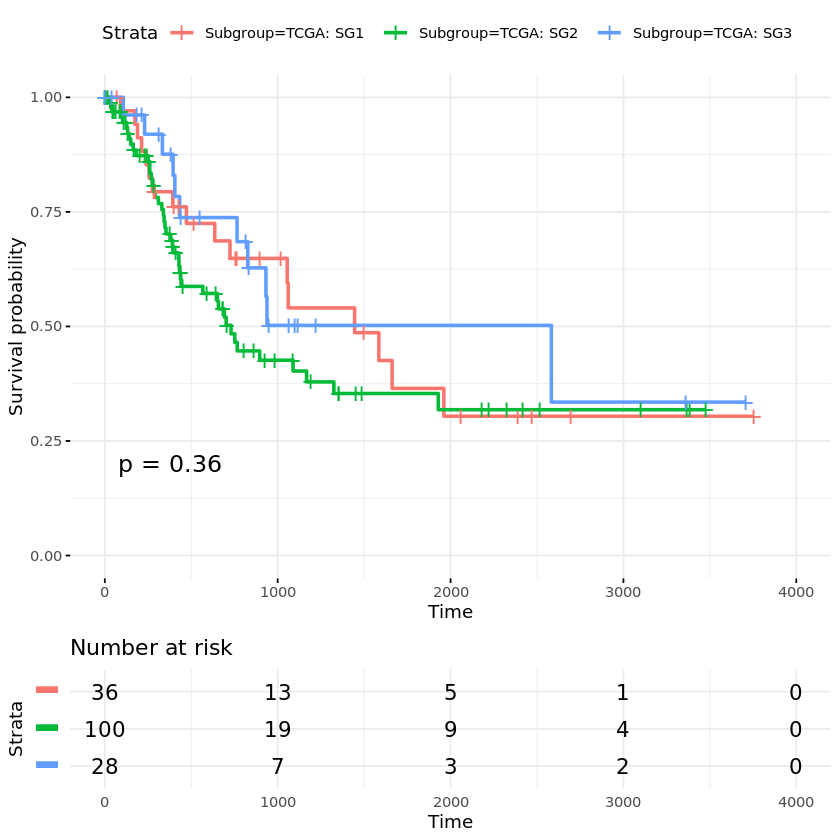

In [35]:
plotSurvival = ggsurvplot(fit, data = TCGAinfoClean, risk.table = T, pval = T, 
               conf.int = F, break.time.by = 1000, ggtheme = theme_minimal(), 
               risk.table.y.text.col = T, risk.table.y.text = F)
#plotSurvival$plot =  plotSurvival$plot + theme(plot.margin = margin(1,0,0,1, "cm"))
#plotSurvival$plot = plotSurvival$plot + labs(tag = "E") + theme(plot.tag.position = c(0, 0.97))
plotSurvival
#png(paste0(outDirectory,"Figure-Kaplan-Meier-subgroup.png"), width=1000,height=700, res = 100)
#p
#dev.off()

In [40]:
# supplement figure E
plSurv = list(plotSurvival$plot, plotSurvival$table)
png(paste0(outDirectory,"SupplFigure-S8-TCGA-survival.png"), width = 3500, height = 1800, res=320)
grid.arrange(grobs = plSurv, ncol=1, heights=c(3,1))
dev.off()

png 
  2